In [1]:
import os, sys
os.environ['ON_PY']="1"
os.chdir("/home/wlc/FJSP-DRL-MAML")
from params import parser
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

[[-0.50443184  1.6459694 ]
 [-1.1411616   0.6606852 ]
 [-1.3828427   0.45742732]
 [-1.7482285   0.10465234]
 [-1.7055908   0.10133271]
 [-1.729046   -0.02740854]
 [-2.043786    0.14278579]
 [ 0.88200885  2.5704782 ]
 [-0.08246674  0.7657841 ]
 [-0.38763627 -0.72351295]
 [-1.7107958   0.25612414]
 [-1.810964   -0.18256946]
 [-1.2936203   0.58776426]
 [-1.3455317   0.51593095]
 [ 1.1573607   1.0020276 ]
 [-0.82102334 -0.02258291]
 [ 0.53605306  0.21852005]
 [-0.615618   -0.19605221]
 [-1.3057911   0.16445436]
 [-2.2316072   1.1144787 ]
 [-1.44589     0.5394378 ]
 [ 1.9602357   0.39687648]
 [ 1.5054886   0.7171314 ]
 [ 0.13609658 -2.3195226 ]
 [ 0.7266109  -0.01484049]
 [-0.5140207  -0.51875377]
 [-1.660028   -0.0201452 ]
 [-1.4973782  -0.68008494]
 [ 2.6339865   0.9384566 ]
 [ 1.6293656   1.3220308 ]
 [ 1.1383926  -1.2222338 ]
 [ 0.8847579  -1.6606493 ]
 [ 0.8899824   0.77012986]
 [-0.72730637 -0.66933453]
 [-1.4828811   0.1516988 ]
 [ 2.0346081   1.6327665 ]
 [ 1.7048588  -0.24546401]
 

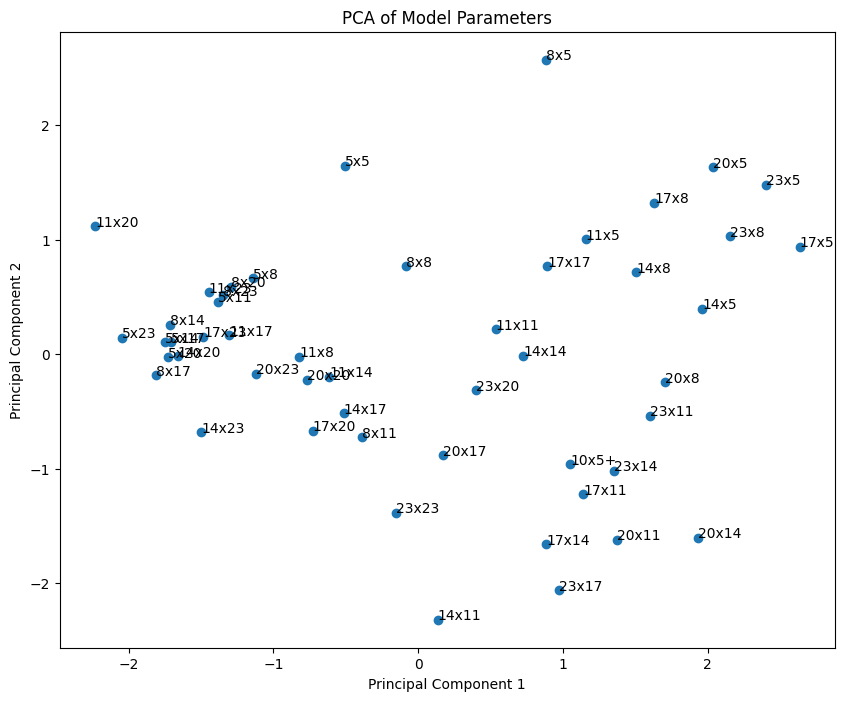

In [10]:
from model.PPO import PPO_initialize

# 初始化 PPO 和参数列表
models = [f"{n_j}x{n_m}x10+mix" for n_j in range(5, 26, 3) for n_m in range(5, 26, 3 )]
models.append("10x5+mix+SD2")
args = ["--test_data", "10x5+mix", "20x5+mix", "15x10+mix", "20x10+mix", "--test_model", *models]
configs = parser.parse_args(args=args)
test_model = [(f'./trained_network/{configs.model_source}/{model_name}.pth', model_name) for model_name in configs.test_model]

param_list = []

# 加载模型参数
for model_path, model_name in test_model:
    ppo = PPO_initialize(configs)
    # print(model_path)
    ppo.policy.load_state_dict(torch.load(model_path, map_location='cuda'))
    parameters = list(ppo.policy.actor.parameters())
    
    param_list.append(parameters)

# 创建参数矩阵
param_matrix = np.array([np.concatenate([p.data.cpu().numpy().flatten() for p in params]).flatten() for params in param_list])

# 使用 PCA 进行降维
pca = PCA(n_components=2)
params_reduced = pca.fit_transform(param_matrix)

# 绘制结果，为每个点添加模型名称标签
plt.figure(figsize=(10, 8))  # 可以调整大小以更好地适应所有标签
plt.scatter(params_reduced[:, 0], params_reduced[:, 1], marker='o')

print(params_reduced)
# 为每个点添加文本标签
for i, label in enumerate([name for _, name in test_model]):
    plt.annotate(label[:-7], (params_reduced[i, 0], params_reduced[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Model Parameters')
plt.show()


[[-1.3635759   0.18507011]
 [-1.0795088  -0.10751664]
 [-0.48441696  0.6134146 ]
 [-1.9619342  -1.1807632 ]
 [-0.10048284  0.3345894 ]
 [ 0.85691524  0.9269268 ]
 [-0.13833968 -0.90225446]
 [ 1.4809976  -1.2887425 ]
 [ 2.457485   -1.7263814 ]
 [ 1.5873953   2.5788395 ]
 [-1.2545365   0.56681615]]


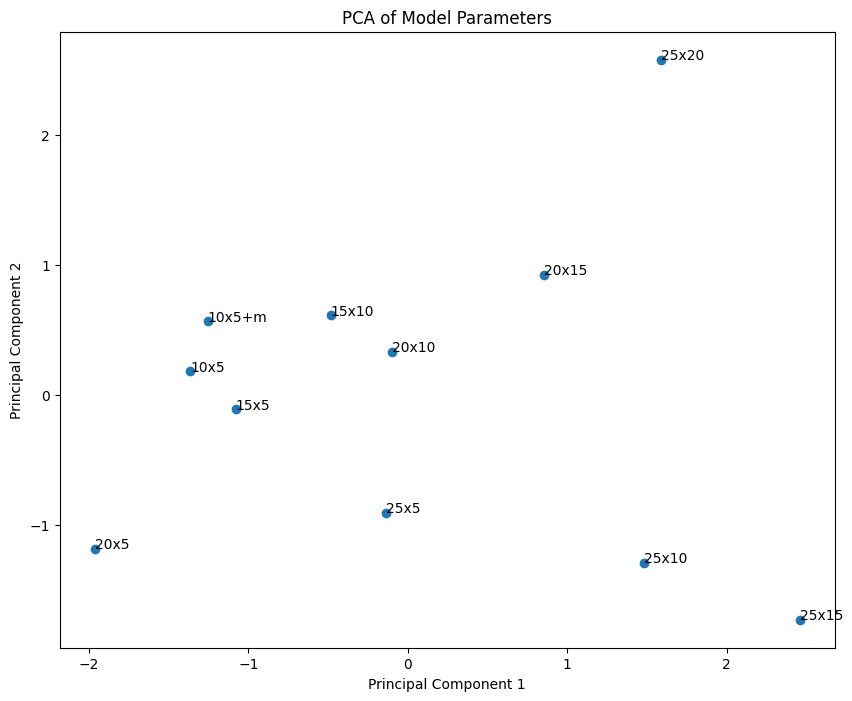

In [16]:

from model.PPO import PPO_initialize

# 初始化 PPO 和参数列表
models = [f"{n_j}x{n_m}x0+mix" for n_j in range(5, 26, 5) for n_m in range(5, 26, 5) if n_j > n_m]
models.append("10x5+mix+SD2")
args = ["--test_data", "10x5+mix", "20x5+mix", "15x10+mix", "20x10+mix", "--test_model", *models]
configs = parser.parse_args(args=args)
test_model = [(f'./trained_network/{configs.model_source}/{model_name}.pth', model_name) for model_name in configs.test_model]

param_list = []

# 加载模型参数
for model_path, model_name in test_model:
    ppo = PPO_initialize(configs)
    # print(model_path)
    ppo.policy.load_state_dict(torch.load(model_path, map_location='cuda'))
    parameters = list(ppo.policy.actor.parameters())
    
    param_list.append(parameters)

# 创建参数矩阵
param_matrix = np.array([np.concatenate([p.data.cpu().numpy().flatten() for p in params]).flatten() for params in param_list])

# 使用 PCA 进行降维
pca = PCA(n_components=2)
params_reduced = pca.fit_transform(param_matrix)

# 绘制结果，为每个点添加模型名称标签
plt.figure(figsize=(10, 8))  # 可以调整大小以更好地适应所有标签
plt.scatter(params_reduced[:, 0], params_reduced[:, 1], marker='o')

print(params_reduced)
# 为每个点添加文本标签
for i, label in enumerate([name for _, name in test_model]):
    plt.annotate(label[:-6], (params_reduced[i, 0], params_reduced[i, 1]))
idx = len(test_model) - 1


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Model Parameters')
plt.show()

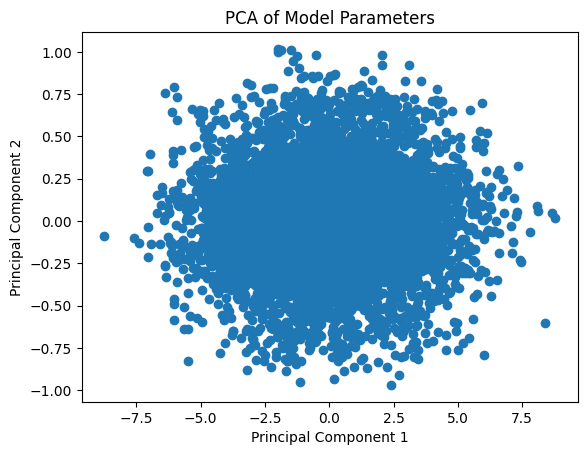

In [4]:


plt.scatter(params_reduced[:, 0], params_reduced[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Model Parameters')
plt.show()
